In [12]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, median_absolute_error
import warnings

from computage.utils.data_utils import download_meta, download_dataset
from computage.utils.nan_utils import EN_nan_row_predict,introduce_nans

from computage.models_library.model import LinearMethylationModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import gzip

# with gzip.open('GSE132203.pkl.gz','rb')as f_in:
#     with open('GSE132203.pkl', 'wb') as f_out:
#         f_out.write(f_in.read())

df = pd.read_pickle('GSE132203.pkl')

In [3]:
data = pd.DataFrame(df['data'])
data = data.T #For current model
X = data
X

,GSM3853125,GSM3853126,GSM3853127,GSM3853128,GSM3853129,GSM3853130,GSM3853131,GSM3853132,GSM3853133,GSM3853134,...,GSM3853910,GSM3853911,GSM3853912,GSM3853913,GSM3853914,GSM3853915,GSM3853916,GSM3853917,GSM3853918,GSM3853919
cg00000029,0.592053,0.542467,0.466598,0.582700,0.586890,0.599623,0.691730,0.545689,0.690579,0.690061,...,0.505306,0.466237,0.537291,NaN,0.693709,0.551843,0.507195,0.651166,0.479801,0.498205
cg00000103,0.987501,0.936105,0.982851,0.962205,0.986249,0.997294,0.992274,0.998444,0.989261,0.970015,...,1.000000,0.929750,0.943954,0.976402,0.974098,0.995657,0.996997,0.997574,0.955905,0.970371
cg00000109,0.983161,0.986668,0.988104,0.988590,0.967364,0.982256,0.955827,0.987770,0.974094,0.966388,...,0.990667,0.951944,0.934649,0.930382,0.953160,0.946689,0.973939,0.974010,0.948228,0.996526
cg00000155,0.985858,0.994086,0.976208,0.983156,0.979459,0.615387,0.998670,0.984364,0.982757,0.987153,...,0.972335,0.986494,0.988983,0.980869,0.978321,0.970678,0.545064,0.978316,0.973159,0.993636
cg00000158,0.992408,0.989934,0.989469,0.988471,0.997209,0.963449,0.998020,0.989225,0.997584,0.983152,...,0.983456,0.990613,0.989583,0.986383,0.983726,0.991711,0.984198,0.985891,0.972671,0.994619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9363764,0.003187,0.498871,0.007293,0.003511,0.991973,0.470207,0.000375,0.582829,0.003982,0.002270,...,0.003341,0.003648,0.003101,0.006281,0.996595,0.005252,0.989340,0.001854,0.587137,0.523851
rs939290,0.003969,0.997551,0.997384,0.595721,0.996531,0.998495,0.997475,0.998974,0.555213,0.999146,...,0.983681,0.996873,0.525627,0.984289,0.514717,0.978751,0.988657,0.991306,0.988791,0.568975
rs951295,0.553545,0.574740,0.529805,0.060715,0.546266,0.953980,0.940583,0.545313,0.542467,0.948355,...,0.521346,0.508852,0.963340,0.035028,0.952502,0.058207,0.945338,0.541269,0.532903,0.956025
rs966367,0.996854,0.477447,0.984310,0.995005,0.994391,0.996112,0.518748,0.997164,0.427396,0.458176,...,0.477011,0.981112,0.995653,0.480051,0.995720,0.997415,0.992372,0.994817,0.497377,0.985993


In [6]:
meta = pd.DataFrame(df['meta'])
y = pd.DataFrame(meta['Age'])
y = y.rename(columns={'Age': 'age'})
#y_test = y
#y_test
y

,age
GSM3853125,49.0
GSM3853126,21.0
GSM3853127,44.0
GSM3853128,51.0
GSM3853129,52.0
...,...
GSM3853915,33.0
GSM3853916,52.0
GSM3853917,24.0
GSM3853918,20.0


In [7]:
meta_hc = meta[meta['Condition']=='HC']

In [8]:
meta[meta['Condition']!='HC']
# в этом датасете все здоровые

,Title,Tissue,CellType,Gender,Age,Ethnicity,Condition,_Merged_caps_and_pss_within_30_days,_tei_total_types_experienced_somewitness,_childabphyssexemot_ctq_01modandsev,_CD4Tcells(%),_NKcells(%),_Bcells(%),_Monocytes(%),_Neutrophiles(%),Platform


In [13]:
model_1 = LinearMethylationModel(name="PhenoAge")

In [20]:
X_nas = introduce_nans(X.transpose())
X_nas

,cg00000029,cg00000103,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
GSM3853125,0.592053,0.987501,0.983161,0.985858,0.992408,0.095346,NaN,0.842573,0.959729,0.820245,...,0.457500,0.004700,0.418612,0.996515,0.514862,0.003187,0.003969,0.553545,0.996854,0.000028
GSM3853126,0.542467,0.936105,0.986668,0.994086,0.989934,0.040725,0.931498,0.790361,0.848165,0.873644,...,NaN,NaN,0.008240,0.510967,0.034542,0.498871,0.997551,0.574740,0.477447,0.684898
GSM3853127,0.466598,0.982851,0.988104,NaN,0.989469,0.067267,0.956232,0.788661,0.995650,0.857318,...,0.995488,0.002135,0.940510,0.506133,0.028268,0.007293,0.997384,0.529805,0.984310,0.604418
GSM3853128,0.582700,0.962205,0.988590,0.983156,0.988471,0.129559,0.900303,0.833435,0.994962,0.891568,...,0.495350,0.998950,0.000078,0.998765,0.951552,0.003511,NaN,0.060715,0.995005,0.999416
GSM3853129,0.586890,0.986249,0.967364,0.979459,0.997209,0.101187,0.914853,0.801992,0.930908,0.907765,...,0.476436,0.001291,0.007983,0.002722,0.532058,0.991973,0.996531,NaN,0.994391,0.999619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3853915,0.551843,0.995657,0.946689,0.970678,0.991711,0.123204,0.941749,0.792590,0.935450,0.905648,...,0.002583,0.376560,0.394963,0.520089,0.517883,0.005252,NaN,0.058207,0.997415,0.628106
GSM3853916,0.507195,NaN,0.973939,0.545064,0.984198,NaN,0.817581,0.952306,0.944585,0.913471,...,0.394404,0.406817,0.018008,0.529650,0.030415,0.989340,0.988657,0.945338,NaN,0.662327
GSM3853917,0.651166,0.997574,NaN,0.978316,0.985891,0.054668,0.927333,0.903286,0.986233,0.906635,...,0.437773,0.002168,NaN,NaN,0.467319,0.001854,0.991306,0.541269,NaN,0.999235
GSM3853918,0.479801,0.955905,0.948228,0.973159,NaN,0.113712,0.869281,0.658921,0.775979,0.939672,...,0.002633,NaN,0.933089,NaN,0.029076,0.587137,NaN,0.532903,0.497377,0.712618


In [27]:
nan_pct = np.linspace(0, 0.9, 19)
#nan_pct = [0.1]
X_test = X
y_test = y

mae_uie = []
r2_uie = []

for p in nan_pct:
    X_nan = introduce_nans(X_test.transpose(), p)
    #X_nan = X_nas
    y_pred_test = model_1.predict(X_nan)
    
    
    
    mae_uie.append(median_absolute_error(y_test, y_pred_test))
    r2_uie.append(r2_score(y_test, y_pred_test))
    

In [30]:
mae_avg = []
r2_avg = []
model_2 = LinearMethylationModel(name="PhenoAge", imputation='average')
for p in nan_pct:
    X_nan = introduce_nans(X_test.transpose(), p)
    #X_nan = X_nas
    y_pred_test = model_2.predict(X_nan )
    
    
    
    mae_avg.append(median_absolute_error(y_test, y_pred_test))
    r2_avg.append(r2_score(y_test, y_pred_test))

In [32]:
mae_ses = []
r2_ses = []
model_3 = LinearMethylationModel(name="PhenoAge", imputation='sesame_450k')
for p in nan_pct:
    X_nan = introduce_nans(X_test.transpose(), p)
    #X_nan = X_nas
    y_pred_test = model_3.predict(X_nan )
    
    
    
    mae_ses.append(median_absolute_error(y_test, y_pred_test))
    r2_ses.append(r2_score(y_test, y_pred_test))

# надо как-то внесение нанов сделать быстрее?

In [28]:
r2_uie

[0.3481327122819715,
 0.2799982672277326,
 0.23831329696717662,
 0.20538772941406203,
 0.15826336525511764,
 0.1232241784657635,
 0.08047667503287181,
 -0.023112794453397978,
 -0.06967879362613694,
 -0.12395139963415391,
 -0.21051868039497657,
 -0.23895912441432587,
 -0.3102000252114505,
 -0.3909418453946043,
 -0.4138446355248939,
 -0.5871066485370406,
 -0.6060627808820649,
 -0.7018194301927714,
 -0.7216946599944483]

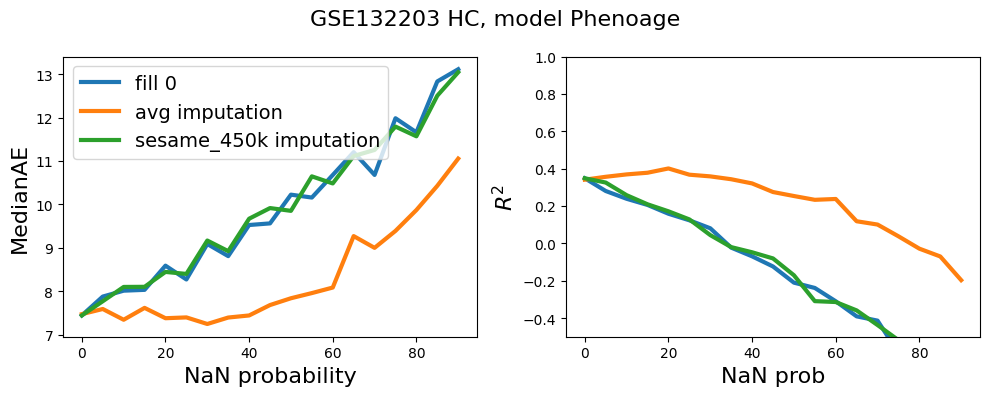

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle(f'GSE132203 HC, model Phenoage', fontsize=16)
ax[0].plot(nan_pct*100, mae_uie, lw=3, label='fill 0')
ax[0].plot(nan_pct*100, mae_avg, lw =3, label = 'avg imputation')
ax[0].plot(nan_pct*100, mae_ses, lw =3, label = 'sesame_450k imputation')
ax[1].plot(nan_pct*100, r2_uie, lw=3)
ax[1].plot(nan_pct*100, r2_avg, lw = 3)
ax[1].plot(nan_pct*100, r2_ses, lw = 3)


ax[0].set_xlabel('NaN probability', fontsize=16)
ax[1].set_xlabel('NaN prob', fontsize=16)
ax[0].set_ylabel('MedianAE', fontsize=16)
ax[1].set_ylabel('$R^2$', fontsize=16)
ax[0].legend(fontsize=14)
ax[1].set_ylim([-0.5, 1.0])
plt.tight_layout()
plt.show()